# Tracé d'un graphique à partir de données expérimentales. Obtention des droites de pentes min et max. 


## Introduction

Ceci est une proposition de méthode, ne pas hésiter à commenter/améliorer !

On utilise un exemple de tracé de caractéristique de dipôle en électricité. Il est nécessaire d'avoir le fichier avec les données expérimentales (UI.txt) dans le même dossier que le Notebook. 

Dans un premier temps, on importe les bibliothèques python nécessaires au traitement des données, à l'affichage des graphiques et à l'analyse statistique. 

Puis on lit fichier UI.txt en utilisant la commande np.loadtxt  

In [1]:
# import de la bibliothèque numpy (gestion de matrices et routines mathématiques) en lui donnant le surnom np
import numpy as np
# import de la bibliothèque matplotlib (graphiques) en lui donnant le surnom plt
import matplotlib.pyplot as plt
# import de la bibliothèque statstics (graphiques) en lui donnant le surnom st
import statistics as st
# Lecture des données
U, I = np.loadtxt('UI.txt', unpack = True, usecols = (0, 1), delimiter = '\t', skiprows = 1)

## Affichage des données expérimentales


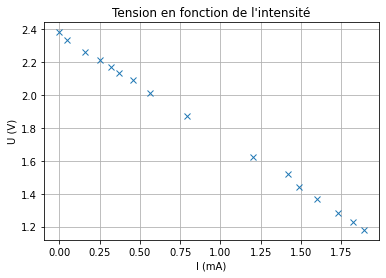

In [2]:
#Tracé de la caractéristique avec titre, axes et unités

plt.plot(I, U, "x")

# Ecriture scientifique pour l'affichage de l'intensité
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (mA)")
plt.ylabel("U (V)")
plt.grid(True)
plt.title("Tension en fonction de l'intensité")
plt.show()


## Calcul de la régression linéaire
On cherche maintenant l'équation de la droite de regression linéaire de ces données:

In [3]:
# Regression linéaire pour la modélisation
coefficients = np.polyfit(I, U, 1)
print (coefficients)

[-0.62283092  2.36738402]


In [4]:
# On réduit le nombre de chiffres significatifs et on rajoute les unités. 
pente=coefficients[0]
ordonnee_origine = coefficients[1]
pente_a = round(pente*1000,)
ordonnee_origine_a = round (ordonnee_origine,2)
print ("L'équation de la droite de régression est : U=",ordonnee_origine_a,"V", pente_a,"Ohm*I")


L'équation de la droite de régression est : U= 2.37 V -623 Ohm*I


## Affichage du modèle
On veut maintenant rajouter le modèle linéaire sur la figure des points expérimentaux. 

Si on veut rajouter l'équation du modèle, on peut rajouter la commande suivante avant d'afficher le graphique:
plt.text(0.0001,1.2,"U=" + str(ordonnee_origine_a)+ str(pente_a)+ "I")


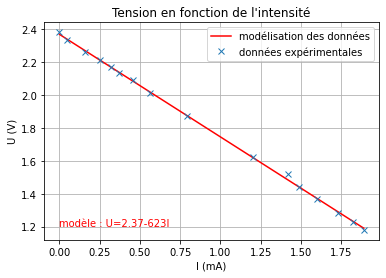

<Figure size 432x288 with 0 Axes>

In [5]:
U_mod=ordonnee_origine + pente*I

plt.plot(I, U_mod,'-r', label="modélisation des données")
plt.plot(I, U, "x", label="données expérimentales")

plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (mA)")
plt.ylabel("U (V)")
plt.legend() 
plt.grid(True)
plt.title("Tension en fonction de l'intensité")

plt.text(0.0001,1.2,"modèle : U=" + str(ordonnee_origine_a)+ str(pente_a)+ "I",color='r')  
plt.show() 
plt.savefig('caract_U_I.png')

## Barres d'erreurs
On cherche maintenant à rajouter les barres d'erreurs. Les incertitudes sur U(enV) et I(en mA) sont données respectivement dans la 3eme et 4eme colonne du fichier UI.txt. 

Text(0.5, 1.0, "Tension en fonction de l'intensité")

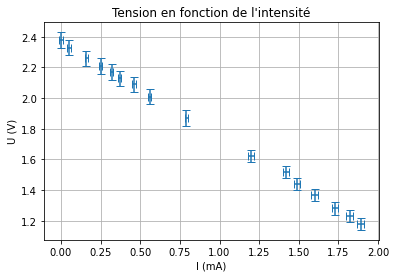

In [7]:
DU, DI = np.loadtxt('UI.txt', unpack = True, usecols = (2, 3), delimiter = '\t', skiprows = 1)
plt.errorbar(I, U, xerr = DI, yerr = DU,capsize=4,fmt = 'none')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (mA)")
plt.ylabel("U (V)")
plt.grid(True)
plt.title("Tension en fonction de l'intensité")

## Génération de toutes les droites qui passent par les boîtes d'erreur. 


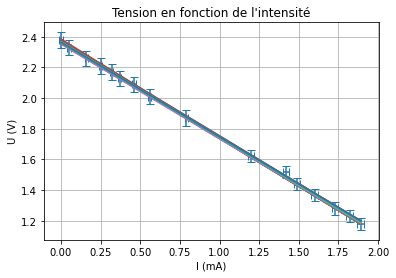

r_g= -623 +/- 0 ohm
E_g= 2.37 +/- 0.02 V


In [8]:
plt.errorbar(I, U, xerr = DI, yerr = DU,capsize=4,fmt = 'none')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (mA)")
plt.ylabel("U (V)")
plt.grid(True)
plt.title("Tension en fonction de l'intensité")

n=50 #nbre de tirages aléatoires
s=3 #nbre d'ecarts type dans une barre d'erreur
l=len(I)
import random

mat_pente=np.zeros([n,2])  # initialisation matrice fit (ax+b)
for i in range (0,n):
    Pf=[random.gauss(0, 1) for j in range(l)]    # génération loi normale réduite centrée
    #Pf=[random.uniform(-1, 1) for j in range(l)]    # génération loi uniforme réduite centrée pour x
    #s=1 #dans le cas d'une distribution uniforme on prend s=1
    I_e=DI*Pf/s+I     # coordonnées nouveau point x
    Pf=[random.gauss(0, 1) for j in range(l)]    # génération loi normale réduite centrée
    #Pf=[random.uniform(-1, 1) for j in range(l)]    # génération loi uniforme réduite centrée pour x
        #s=1 #dans le cas d'une distribution uniforme on prend s=1 
    U_e=DU*Pf/s+U    # coordonnées nouveau point y
    pp=np.polyfit(I_e,U_e,1) # régression linéaire sur point (x_e,y_e)
    mat_pente[i,]=pp  
    U_mod=pp[0]*I+pp[1]
    plt.plot(I, U_mod)
plt.show()

erreur_p=round(s*st.stdev(mat_pente[:,1]))  # ecartypes sur pentes (même nb que s)
erreur_o=round(s*st.stdev(mat_pente[:,0]),2)  # ecartypes sur pentes (même nb que s)
print("r_g=",pente_a,"+/-",erreur_p, "ohm")
print("E_g=",ordonnee_origine_a,"+/-",erreur_o, "V")

In [17]:
# Erreur sur la régression

def err_reg(n,s,l,x,y,dx,dy):
    mat_pente=np.zeros([n,2])  # initialisation matrice fit (ax+b)
    for i in range (0,n):
        Pf=[random.gauss(0, 1) for j in range(l)]    # génération loi normale réduite centrée
        #Pf=[random.uniform(-1, 1) for j in range(l)]    # génération loi uniforme réduite centrée pour x
        #s=1 #dans le cas d'une distribution uniforme on prend s=1
        x_e=dx*Pf/s+x     # coordonnées nouveau point x
        Pf=[random.gauss(0, 1) for j in range(l)]    # génération loi normale réduite centrée
        #Pf=[random.uniform(-1, 1) for j in range(l)]    # génération loi uniforme réduite centrée pour x
        #s=1 #dans le cas d'une distribution uniforme on prend s=1
        y_e=dy*Pf/s+y    # coordonnées nouveau point y
        pp=np.polyfit(x_e,y_e,1) # régression linéaire sur point (x_e,y_e)
        mat_pente[i,]=pp  
        y_mod=pp[0]*I+pp[1]
        plt.plot(x, y_mod) # à commenter si on ne veut pas d'affichage
    plt.show()
    erreur_p=round(s*st.stdev(mat_pente[:,1]))  # ecartypes sur pentes (même nb que s)
    erreur_o=round(s*st.stdev(mat_pente[:,0]),2)  # ecartypes sur pentes (même nb que s)
    return erreur_p, erreur_o

Appel de la fonction:

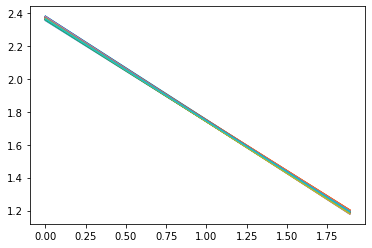

L'équation de la droite de régression est : U=( 2.37 +/- 0.02 )V+( -623 +/- 0 ) Ohm*I


In [18]:
n=50 
s=3 #nbre d'ecarts type dans une barre d'erreur
l=len(I)
(erreur_p,erreur_o) = err_reg(n,s,l,I,U,DI,DU)
print ("L'équation de la droite de régression est : U=(",ordonnee_origine_a,"+/-",erreur_o ,")V+(",
       pente_a,"+/-",erreur_p,") Ohm*I")